In [3]:
# Librerías principales
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Carga el dataset limpio
df = pd.read_csv("avocado_clean.csv")

# Verifica estructura
print(df.shape)
df.head()


(18249, 65)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015-12-27,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,...,False,False,False,False,False,False,False,False,False,False
1,2015-12-20,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,...,False,False,False,False,False,False,False,False,False,False
2,2015-12-13,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,...,False,False,False,False,False,False,False,False,False,False
3,2015-12-06,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,...,False,False,False,False,False,False,False,False,False,False
4,2015-11-29,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Variable objetivo
y = df["AveragePrice"]

# Variables predictoras
X = df.drop(columns=["AveragePrice", "Date"], errors="ignore")


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño del entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)


Tamaño del entrenamiento: (14599, 63)
Tamaño de prueba: (3650, 63)


In [7]:
#Se entrenan los 3 modelos de regresión
#Regresión lineal

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Regresión Lineal:")
print("R²:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Regresión Lineal:
R²: 0.5457525128026509
MSE: 0.45012792692619724


In [8]:
#Random forest regressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print("R²:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))



Random Forest:
R²: 0.856264159458346
MSE: 0.14243230342824176


In [9]:
#Red neuronal

mlp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("Red Neuronal:")
print("R²:", r2_score(y_test, y_pred_mlp))
print("MSE:", mean_squared_error(y_test, y_pred_mlp))


Red Neuronal:
R²: -0.05669942541888218
MSE: 1.0471162420349456


In [10]:
#Se comparan los resultados

results = pd.DataFrame({
    "Modelo": ["Regresión Lineal", "Random Forest", "Red Neuronal"],
    "R²": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_mlp)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_mlp)
    ]
})

results


,Modelo,R²,MSE
0,Regresión Lineal,0.545753,0.450128
1,Random Forest,0.856264,0.142432
2,Red Neuronal,-0.056699,1.047116


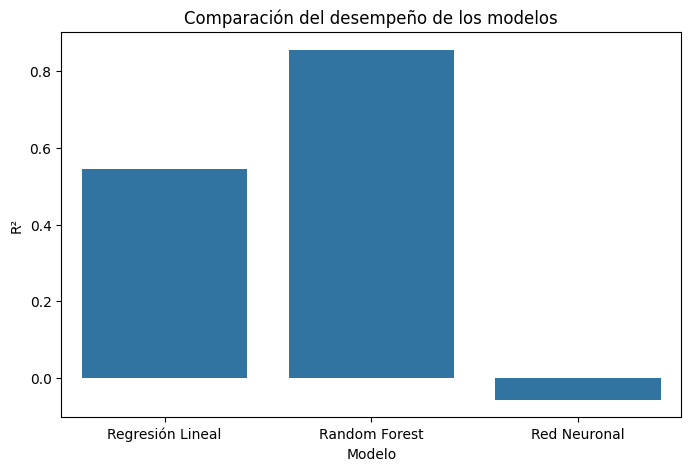

In [11]:
#Visualización de los resultados

plt.figure(figsize=(8,5))
sns.barplot(x="Modelo", y="R²", data=results)
plt.title("Comparación del desempeño de los modelos")
plt.show()
